# Model to predict Expenses of various people of Different Ages

## Importing the needed libraries
1. Pandas to read the csv file
2. Numpy for mathematical operations
3. Matplotlib for plotting
4. Math for mathematical operations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Reading in the Dataset
Using the pandas library to read in the dataset.

In [3]:
df = pd.read_csv('./insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Picking X and Y values
I am using a single Feature to predict the amount of the Expenses.
i.e: Age of the person

In [6]:
x = df["age"]
y = df["expenses"]

In [7]:
x

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [8]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

### Normalizing the Y values

### Function for Normalization

In [9]:
def normalize(values, min_value, max_value):
    values = np.array(values)
    normalized_values = (values - min_value) / (max_value - min_value)
    return normalized_values

### Function for Un-Normalization

In [10]:
def unnormalize(normalized_values, min_value, max_value):
    normalized_values = np.array(normalized_values)
    unnormalized_values = normalized_values * (max_value - min_value) + min_value
    return unnormalized_values

In [11]:
y_normalized = normalize(y, y.min(), y.max())

In [12]:
y_normalized

array([0.25161073, 0.00963598, 0.05311519, ..., 0.00810809, 0.01414366,
       0.44724875])

## Plotting  the distribution of Ages to Expennses

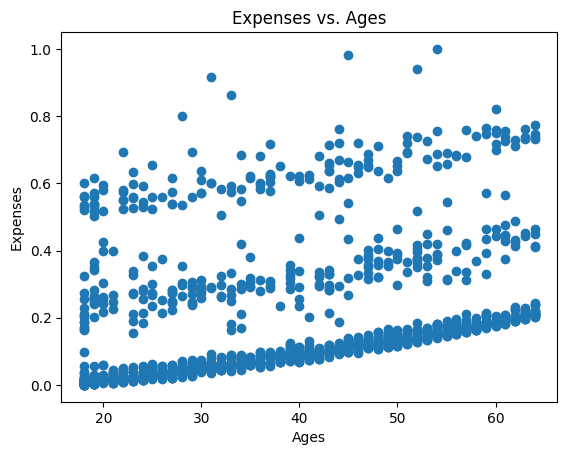

In [13]:
plt.scatter(x, y_normalized)
plt.xlabel("Ages")
plt.ylabel("Expenses")
plt.title("Expenses vs. Ages")
plt.show()

## Calculating the Predictions for Each value of X

In [14]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

### Plotting the Predictions to compare with the actual values

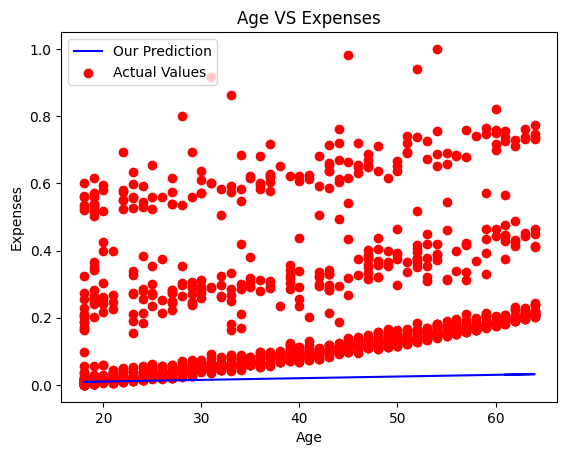

In [15]:
w = 0.0005
b = 0
tmp_f_wb = compute_model_output(x, w, b)
plt.plot(x, tmp_f_wb, c="b", label="Our Prediction")
plt.scatter(x, y_normalized, c="r", label="Actual Values")
plt.title("Age VS Expenses")
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.legend()
plt.show()

## Making Intitial Prediction

In [16]:
x_i = 19
expense_19yrs = w * x_i + b
print(f"Predicted Expense for 19 year olds is ${unnormalize(expense_19yrs, y.min(), y.max()):.2f}")

Predicted Expense for 19 year olds is $1717.03


## Using Gradient Descent to find the best fit line

### Computing the Cost

In [17]:
def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    cost_sum = 0
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [18]:
compute_cost(x, y_normalized, w, b)

0.03347995204569492

### Computing the Gradient

In [20]:
def compute_gradient(x, y, w, b): 
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [21]:
compute_gradient(x, y_normalized, w, b)

(-7.547103254901832, -0.17431239556196695)

### Using Gradient Descent

In [22]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [23]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 0.0001
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x ,y_normalized, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 3.10e-02  dj_dw: -8.414e+00, dj_db: -1.939e-01   w:  8.414e-04, b: 1.93916e-05
Iteration 1000: Cost 1.71e-02  dj_dw:  8.261e-05, dj_db: -3.654e-03   w:  4.841e-03, b: 4.77510e-04


KeyboardInterrupt: 

Test 1 Parameters:
1. iterations = 10000
2. tmp_alpha = 0.000001 <br>
(w,b) found by gradient descent: (  0.0048,  0.0001)

Test 2 Parameters:
1. iterations = 10000
2. tmp_alpha = 0.001 <br>(w,b) found by gradient descent: (  0.0043,  0.0222)

Test 3 Parameters:
1. iterations = 10000
2. tmp_alpha = 0.0001 <br>(w,b) found by gradient descent: (  0.0048,  0.0036)

### Test 1 Plot and Cost

The cost is 0.017061782023065384


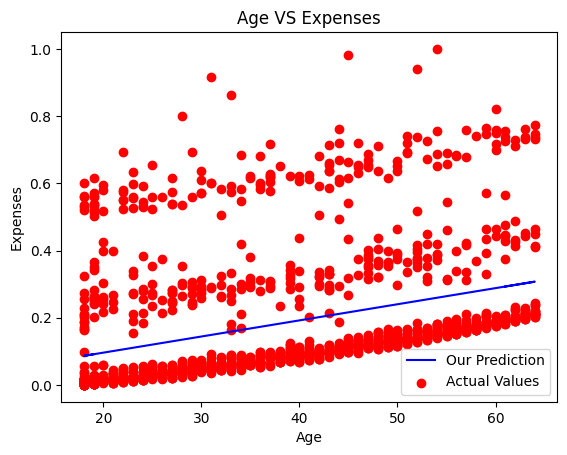

In [24]:
w = 0.0048
b = 0.0001
final_prediction = compute_model_output(x, w, b)
print(f"The cost is {compute_cost(x, y_normalized, w, b)}")
plt.plot(x, final_prediction, c="b", label="Our Prediction")
plt.scatter(x, y_normalized, c="r", label="Actual Values")
plt.title("Age VS Expenses")
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.legend()
plt.show()


### Test 2 Plot and Cost (Lowest Cost)

The cost is 0.017007839846862854


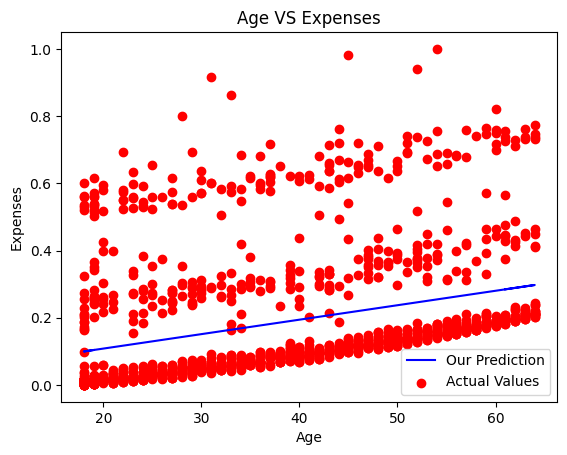

In [25]:
w = 0.0043
b = 0.0222
final_prediction = compute_model_output(x, w, b)
print(f"The cost is {compute_cost(x, y_normalized, w, b)}")
plt.plot(x, final_prediction, c="b", label="Our Prediction")
plt.scatter(x, y_normalized, c="r", label="Actual Values")
plt.title("Age VS Expenses")
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.legend()
plt.show()

### Test 3 Plot and Cost

The cost is 0.01704822937103494


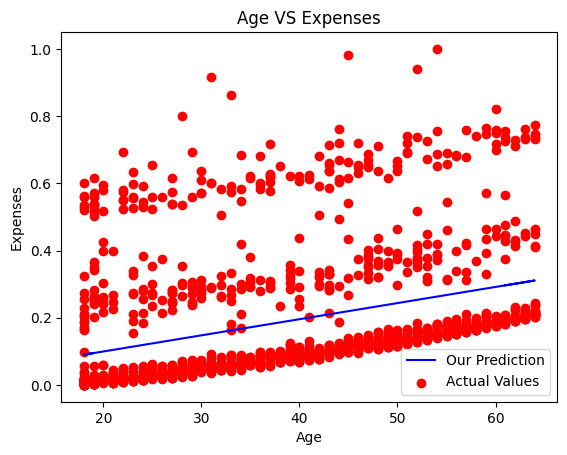

In [26]:
w = 0.0048
b = 0.0036
final_prediction = compute_model_output(x, w, b)
print(f"The cost is {compute_cost(x, y_normalized, w, b)}")
plt.plot(x, final_prediction, c="b", label="Our Prediction")
plt.scatter(x, y_normalized, c="r", label="Actual Values")
plt.title("Age VS Expenses")
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.legend()
plt.show()

## Making final predictions

In [27]:
w = 0.0043
b = 0.0222
x_i = 19
expense_19yrs = w * x_i + b
print(f"Predicted Expense for 19 year olds is ${unnormalize(expense_19yrs, y.min(), y.max()):.2f}")

Predicted Expense for 19 year olds is $7631.06


## Summary

**Gradient Descent Tests:**
- **Test 1:** Learning rate of 0.000001, with parameters \( w = 0.0048 \) and \( b = 0.0001 \).
- **Test 2 (Best):** Learning rate of 0.001, yielding parameters \( w = 0.0043 \) and \( b = 0.0222 \), which achieved the lowest cost.
- **Test 3:** Learning rate of 0.0001, with parameters \( w = 0.0048 \) and \( b = 0.0036 \).

**Cost Improvement:**
- The cost improved by approximately **49%** from an initial value of 0.0335 to a final value of 0.0170 using the best gradient descent parameters.

**Prediction:**
- With the best parameters from Test 2, the predicted expense for a 19-year-old is approximately **$7631.06**.

This significant improvement in cost indicates that the model with a learning rate of 0.001 provides a much better fit for predicting expenses based on age.

---

## Using the Sklearn Linear Regression Model

In [36]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y_normalized)

LinearRegression()

In [41]:
def compute_cost_1(x, y, w, b):
    m = len(y)  # Number of samples
    predictions = x.dot(w) + b
    cost = np.sum((predictions - y) ** 2) / (2 * m)
    return cost
w = model.coef_
b = model.intercept_
print(f"The cost is {compute_cost_1(x, y_normalized, w, b)}")

The cost is 0.01699953480794175


## My own Prediction Vs Sklearn Prediction

### Percentage Improvement Calculation
1. Cost 1 is the initial cost (0.017007839846862854). (My Prediction Cost)
2. Cost 2 is the new cost (0.01699953480794175). (Sklearn prediction Cost)

### Result
The second cost is only better by 0.048% 

This result indicates how much the second cost is an improvement over the first cost in percentage terms.